In [1]:
import numpy as np
import pandas as pd
import dabest
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
my_color_palette =  {'NaCl':'#594157','Convulsive PTZ':'#db3021','Control':'#594157','Post-Ictal':'#3287d1'}

In [2]:
# Load network (NMF) data 
SP_per_min_PTZ_sz_network = pd.read_pickle('Mice_data/'+'SP_per_min_PTZ_sz_network')

All_sessions = SP_per_min_PTZ_sz_network['Filename'].unique()

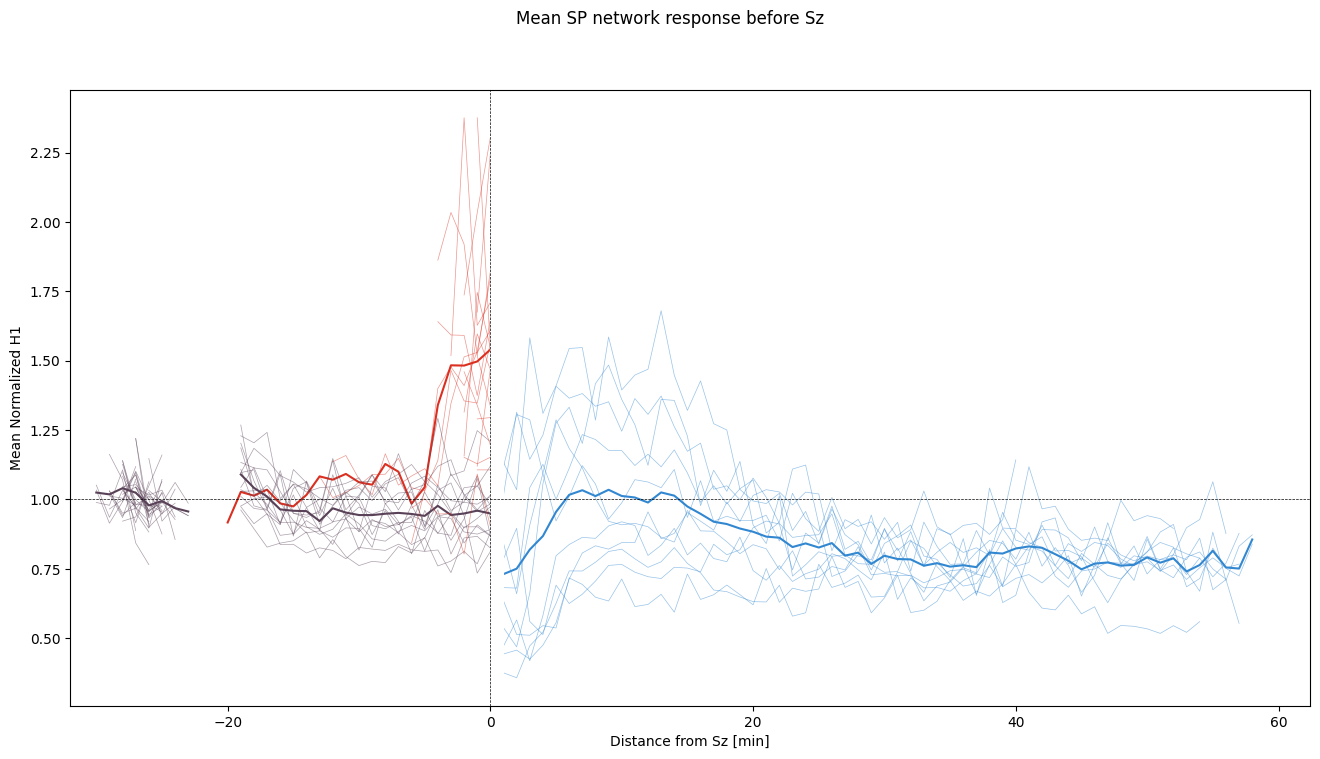

In [3]:
# Plot network (NMF) response to single pulse before Sz 
title = 'Mean SP network response before Sz'
fig1 = plt.figure(title, figsize=(16, 8)).suptitle(title)
gridspec.GridSpec(12, 12)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
sns.lineplot(ax=ax1, data=SP_per_min_PTZ_sz_network, x='Distance from Sz [min]', y='Mean Normalized H1',  errorbar=None, zorder=0, hue="Condition", palette=my_color_palette)
for session in All_sessions:
    df = SP_per_min_PTZ_sz_network[SP_per_min_PTZ_sz_network['Filename']==session]
    sns.lineplot(ax=ax1, data=df, x='Distance from Sz [min]', y='Mean Normalized H1', errorbar=None,zorder=0, lw=0.5, alpha=0.5,hue="Condition", palette=my_color_palette)
ax1.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
ax1.axhline(y=1, color='k', linestyle='--', linewidth=0.5)
ax1.axvspan(0, 1, edgecolor='w', facecolor='w', linestyle="--", alpha=1, lw=0.1, zorder=1)
ax1.set_xlim(left=-32)
ax1.legend([], [], frameon=False)

In [4]:
# Calculate mean difference in a given pre-ictal interval 
min_dist_Sz = -4 #S tart pre-ictal interval in min
max_dist_Sz = 0 # End pre-ictal interval in min

# Keep only pulse responses in interval 
df_interval = SP_per_min_PTZ_sz_network[np.logical_and(SP_per_min_PTZ_sz_network['Distance from Sz [min]'] > min_dist_Sz, 
                                              SP_per_min_PTZ_sz_network['Distance from Sz [min]'] <= max_dist_Sz)]

# Mean values for each session
mean_SP_df = df_interval.groupby(['Filename']).agg({'Filename':['first'],'Mean Normalized H1': ['mean', 'std'], 'Condition':['first']})
mean_SP_df.columns = ['Filename','Mean Normalized H1', 'SD Normalized H1', 'Condition']

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:389: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:438: UserWarning: FixedFormatter should only be used together with FixedLocator
  rawdata_axes.set_xticklabels(ticks_with_counts)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:559: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean().loc[current_control, yvar]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:561: FutureWarning: The default value of numeric_only in Da

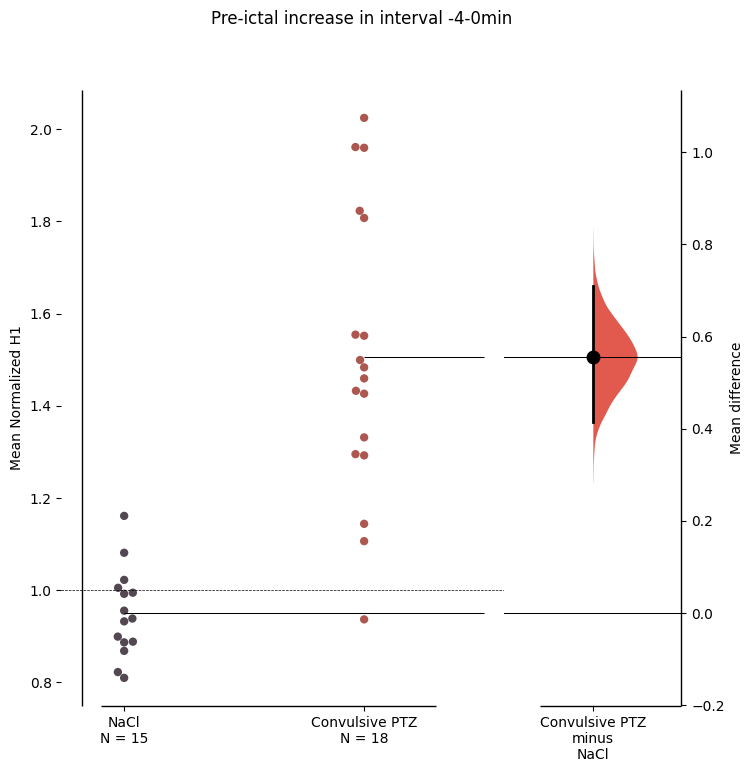

In [57]:
# Plot Mean difference across conditions in a given pre-ictal interval
cnd = ['NaCl','Convulsive PTZ']
title= 'Pre-ictal increase in interval '+str(min_dist_Sz)+'-'+str(max_dist_Sz)+'min before Sz'
fig1 = plt.figure(title, figsize=(8, 8)).suptitle(title)
gridspec.GridSpec(12, 12)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)

paired_group = dabest.load(mean_SP_df, x="Condition",y='Mean Normalized H1', idx=cnd,paired=False, id_col='Filename')
paired_group.mean_diff.plot(ax=ax1,custom_palette=my_color_palette)
ax1.axhline(y=1, color='k', linestyle='--', linewidth=0.5)

result_Bootstrap = paired_group.mean_diff.statistical_tests